In [53]:
%load_ext autoreload
%autoreload 2

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
from classifier_choice import *

In [69]:
from well_load import *

In [56]:
digits = datasets.load_digits()

In [57]:
data = digits.data
labels = digits.target

(1797,)


In [58]:
n_samples, n_features = data.shape

In [59]:
methods = [ 'pca', 'isomap', 'lle', 'mlle', 'hlle', 'ltsa', 'mds', 'trees','tsne']

In [174]:
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    plt.figure(figsize=(20,15))
    plt.scatter(X[:,0],X[:,1])
    plt.axis('equal')
    
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [164]:
for mathod in methods:
    clf = classifier_choice(mathod)
    clusters = data_fit(clf,data)
    plot_embedding(clusters,labels,mathod)
plt.show()

KeyboardInterrupt: 

In [120]:
from sklearn import preprocessing
well_data = wells_load("wells")

le = preprocessing.LabelEncoder()
le.fit(well_data['Well'].unique())
well_labels = le.transform(well_data['Well'])
well_data.head()

,DEN,DT,DTS,DTS_I7,DTS_MLFILLED,GR,LITHESA10,LITHESA9_FILTR,LITHESA9_I4,LITHESA9_I8,LITHESA9_I8I4,NPHI,PHIE_I7,PHIE_I8I7,PHIE_MLFILLED,RDEP,RMED,Well,TD
0,2.001409,155.183043,481.094017,519.064866,481.094017,10.481200,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.22121
1,2.001409,155.183043,481.094017,519.064866,481.094017,10.702790,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.37361
2,2.001409,155.183043,481.094017,519.064866,481.094017,10.547792,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.52601
3,2.001409,155.183043,481.094017,519.064866,481.094017,10.420900,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.67841
4,2.001409,155.183043,481.094017,519.064866,481.094017,11.238597,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.83081


In [122]:
from time import time
t0 = time()
classifier = classifier_choice('tsne')
well_clusters = data_fit(classifier,well_data.drop(['Well'],axis=1))
print(time()-t0)

369.5524911880493


In [108]:
well_data['Well'].

array(['16_7-10.las'], dtype=object)

In [123]:
plot_embedding(well_clusters,well_labels,'PCA')

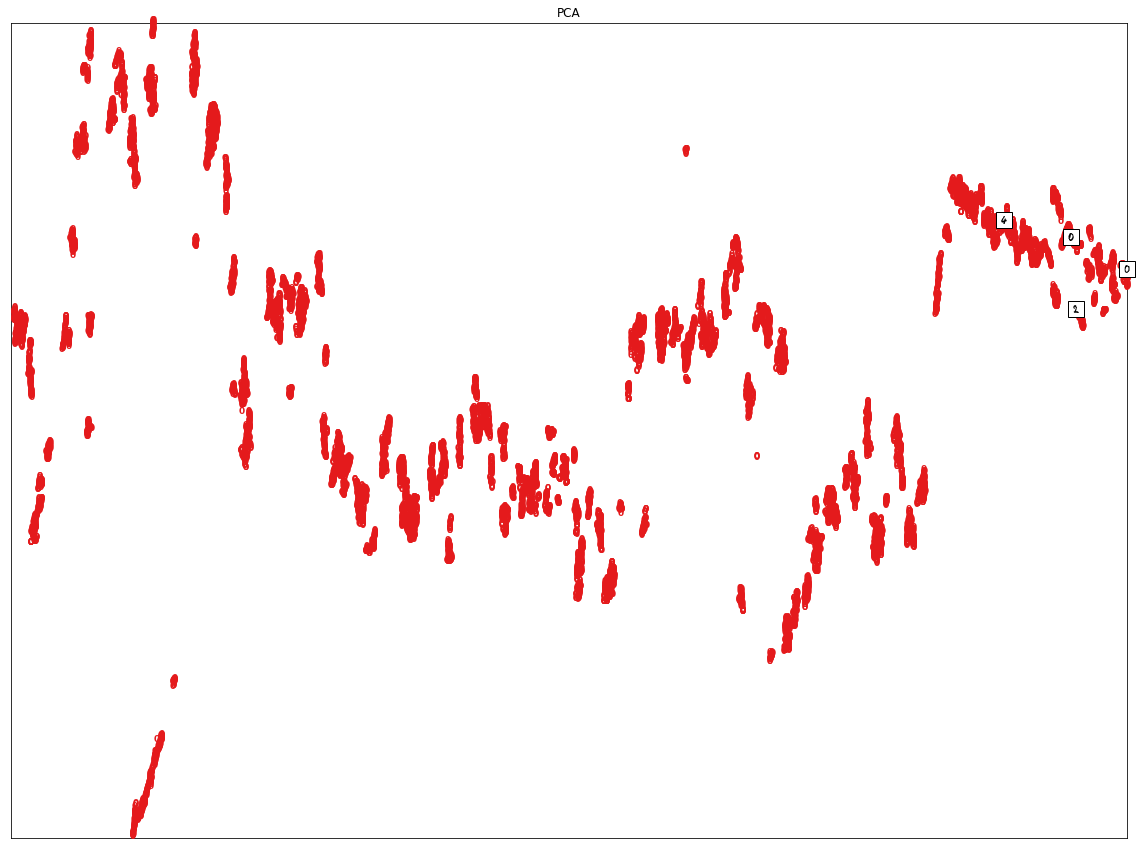

In [124]:
plt.show()

In [125]:
from time import time
t0 = time()
classifier = classifier_choice('tsne')
well_clusters = data_fit(classifier,well_data.drop(['Well','TD'],axis=1))
print(time()-t0)

327.2655189037323


In [126]:
plot_embedding(well_clusters,well_labels,'PCA')

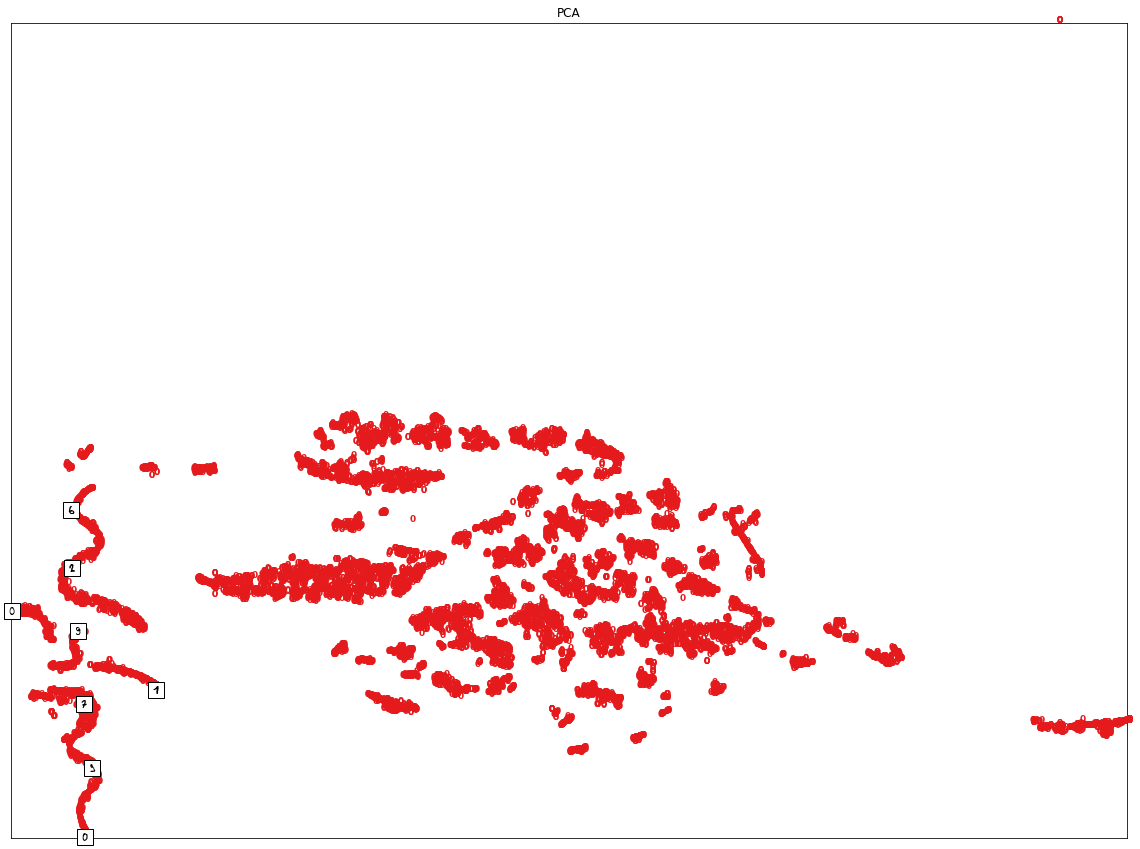

In [127]:
plt.show()

In [133]:
plot_embedding(well_clusters,well_labels,'T-SNE')

In [134]:
plt.show()

In [158]:
from time import time
t0 = time()
piper = chainer('robust','tsne')

In [159]:
well_clusters = data_fit(piper,well_data.drop(['Well','TD'],axis=1))
print(time()-t0)

1109.3879504203796


In [181]:
clean_cluster = well_clusters.copy()
clean_cluster[clean_cluster > 1000] = 0

<Figure size 1440x1080 with 0 Axes>

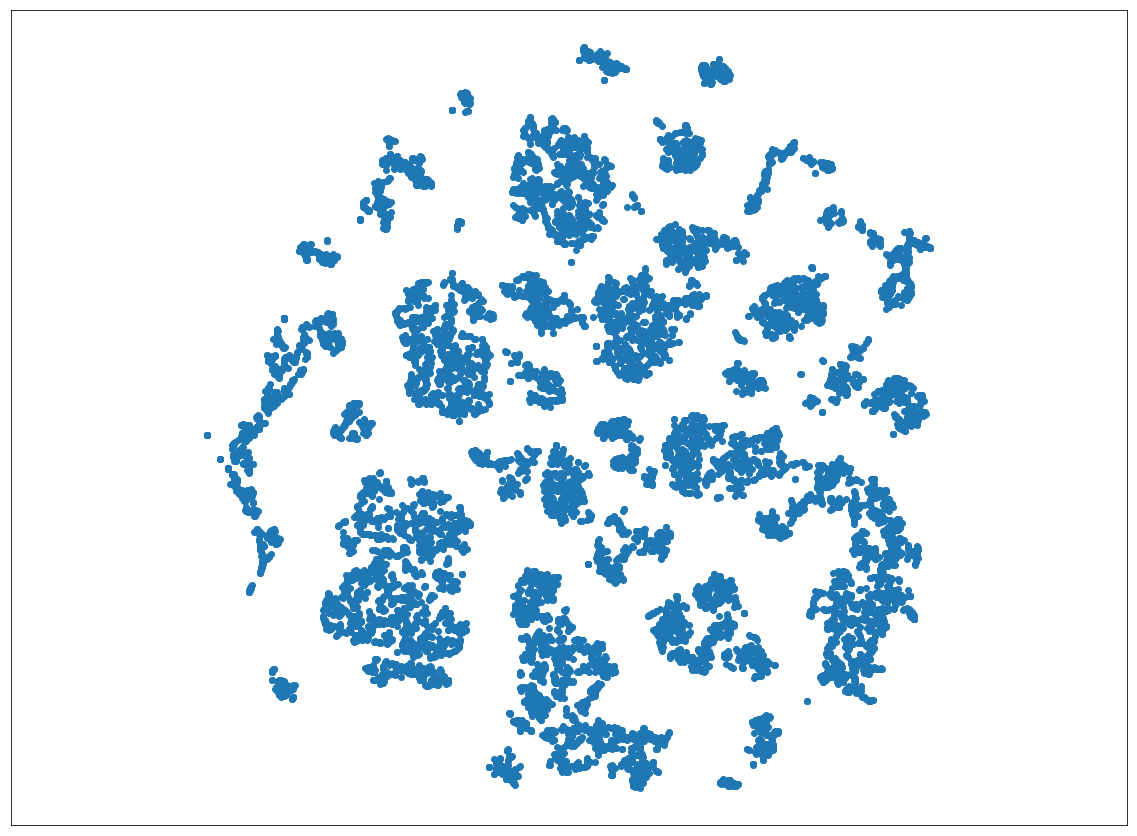

In [182]:
plot_embedding(clean_cluster)
plt.show()